## SNS 데이터 카테고리별 일별 빈도수

In [1]:
import pandas as pd
from konlpy.tag import Okt
import re
import matplotlib.pyplot as plt
import numpy as np

news = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_3.xlsx', encoding='cp949')

In [ ]:
news1 = pd.read_excel('C:/Users/student/Desktop/SNS데이터/SNS_1.xlsx', encoding='cp949')
news2 = pd.read_excel('C:/Users/student/Desktop/SNS데이터/SNS_2.xlsx', encoding='cp949')
news3 = pd.read_excel('C:/Users/student/Desktop/SNS데이터/SNS_3.xlsx', encoding='cp949')
news4 = pd.read_excel('C:/Users/student/Desktop/SNS데이터/SNS_4.xlsx', encoding='cp949')
news5 = pd.read_excel('C:/Users/student/Desktop/SNS데이터/SNS_5.xlsx', encoding='cp949')
news6 = pd.read_excel('C:/Users/student/Desktop/SNS데이터/SNS_6.xlsx', encoding='cp949')
news7 = pd.read_excel('C:/Users/student/Desktop/SNS데이터/SNS_7.xlsx', encoding='cp949')
news8 = pd.read_excel('C:/Users/student/Desktop/SNS데이터/SNS_8.xlsx', encoding='cp949')
news_total = pd.concat([news1,news2,news3,news4,news5,news6,news7,news8])

news1 = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_1.xlsx', encoding='cp949')
news2 = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_2.xlsx', encoding='cp949')
news3 = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_3.xlsx', encoding='cp949')
news4 = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_4.xlsx', encoding='cp949')
news5 = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_5.xlsx', encoding='cp949')
news6 = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_6.xlsx', encoding='cp949')
news7 = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_7.xlsx', encoding='cp949')
news8 = pd.read_excel('C:/Users/SunA/Desktop/SNS데이터/SNS_8.xlsx', encoding='cp949')

In [29]:
news = [news1,news2,news3,news4,news5,news6,news7,news8]

In [30]:
for i,n in enumerate(news):
    print(i+1,'=',len(n))

1 = 175656
2 = 156112
3 = 72036
4 = 67609
5 = 86101
6 = 134219
7 = 63193
8 = 21689


In [3]:
news_total = pd.concat([news1,news2,news3,news4,news5,news6,news7,news8])

In [4]:
len(news_total)

777832

In [5]:
#CONTENT에 대해 중복된 항 제거
news_total = news_total.drop_duplicates(['CONTENT'], keep='last')

In [6]:
len(news_total)

716267

In [7]:
#결측치 제거
news_total['TITLE'] = news_total['TITLE'].fillna('제목없음')
news_total = news_total.dropna()
news_total = news_total.reset_index(drop = 'True')

In [8]:
len(news_total)

716266

미세먼지 관련 sns data 빈도수 보자

In [9]:
date = [pd.to_datetime(str(news_total['DATE'][i])[:8]) for i in range(len(news_total))]

In [10]:
len(set(date))

365

In [66]:
news_total['SECTION'][170000]

'블로그'

In [11]:
total_cnt={}
for i in set(date):
    cnt = 0
    for j in range(len(date)):
        if i==date[j]:
            cnt+=1
    total_cnt[i] = cnt
    print(i)

2018-11-24 00:00:00
2019-02-15 00:00:00
2018-09-26 00:00:00
2018-05-06 00:00:00
2018-11-29 00:00:00
2019-01-12 00:00:00
2018-04-13 00:00:00
2018-04-21 00:00:00
2018-04-06 00:00:00
2018-10-03 00:00:00
2018-06-26 00:00:00
2019-01-04 00:00:00
2018-08-11 00:00:00
2018-12-28 00:00:00
2018-07-22 00:00:00
2018-09-18 00:00:00
2018-12-29 00:00:00
2019-01-27 00:00:00
2018-08-27 00:00:00
2019-03-29 00:00:00
2018-07-08 00:00:00
2018-09-23 00:00:00
2018-04-26 00:00:00
2018-04-12 00:00:00
2019-03-31 00:00:00
2019-02-11 00:00:00
2018-06-23 00:00:00
2018-10-08 00:00:00
2018-06-20 00:00:00
2018-05-17 00:00:00
2018-10-22 00:00:00
2019-03-24 00:00:00
2018-07-18 00:00:00
2018-07-27 00:00:00
2018-06-01 00:00:00
2018-09-09 00:00:00
2019-01-14 00:00:00
2019-01-26 00:00:00
2018-11-18 00:00:00
2018-08-28 00:00:00
2018-12-15 00:00:00
2018-10-25 00:00:00
2019-01-05 00:00:00
2018-10-27 00:00:00
2019-03-11 00:00:00
2018-11-03 00:00:00
2018-11-06 00:00:00
2019-02-22 00:00:00
2018-12-20 00:00:00
2018-12-06 00:00:00


C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


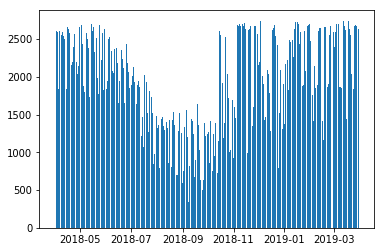

In [12]:
plt.bar(total_cnt.keys(),total_cnt.values())
plt.show()

In [49]:
news_data = news_total[news_total['SECTION']=='뉴스']
blog_data = news_total[news_total['SECTION']=='블로그']
cafe_data = news_total[news_total['SECTION']=='카페']
print(len(news_data))

181371


In [25]:
news_cnt = {}
cnt=0
for i in set(date):
    cnt = 0
    for j in range(len(news_data)):
        if i==date[j]:
            cnt+=1
    news_cnt[i] = cnt
    print(i) 

2018-11-24 00:00:00
2019-02-15 00:00:00
2018-09-26 00:00:00
2018-05-06 00:00:00
2018-11-29 00:00:00
2019-01-12 00:00:00
2018-04-13 00:00:00
2018-04-21 00:00:00
2018-04-06 00:00:00
2018-10-03 00:00:00
2018-06-26 00:00:00
2019-01-04 00:00:00
2018-08-11 00:00:00
2018-12-28 00:00:00
2018-07-22 00:00:00
2018-09-18 00:00:00
2018-12-29 00:00:00
2019-01-27 00:00:00
2018-08-27 00:00:00
2019-03-29 00:00:00
2018-07-08 00:00:00
2018-09-23 00:00:00
2018-04-26 00:00:00
2018-04-12 00:00:00
2019-03-31 00:00:00
2019-02-11 00:00:00
2018-06-23 00:00:00
2018-10-08 00:00:00
2018-06-20 00:00:00
2018-05-17 00:00:00
2018-10-22 00:00:00
2019-03-24 00:00:00
2018-07-18 00:00:00
2018-07-27 00:00:00
2018-06-01 00:00:00
2018-09-09 00:00:00
2019-01-14 00:00:00
2019-01-26 00:00:00
2018-11-18 00:00:00
2018-08-28 00:00:00
2018-12-15 00:00:00
2018-10-25 00:00:00
2019-01-05 00:00:00
2018-10-27 00:00:00
2019-03-11 00:00:00
2018-11-03 00:00:00
2018-11-06 00:00:00
2019-02-22 00:00:00
2018-12-20 00:00:00
2018-12-06 00:00:00


In [48]:
sum(news_cnt.values())

181371

<BarContainer object of 365 artists>

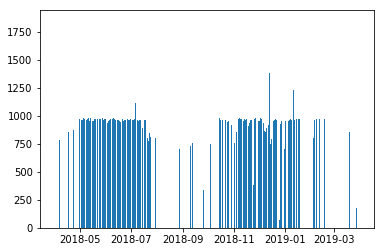

In [41]:
plt.bar(news_cnt.keys(),news_cnt.values())

In [43]:
cnt = 0
for i in news_cnt.values():
    if i == 0:
        cnt+=1

In [47]:
news_cnt

{Timestamp('2018-11-24 00:00:00'): 765,
 Timestamp('2019-02-15 00:00:00'): 965,
 Timestamp('2018-09-26 00:00:00'): 336,
 Timestamp('2018-05-06 00:00:00'): 974,
 Timestamp('2018-11-29 00:00:00'): 969,
 Timestamp('2019-01-12 00:00:00'): 1231,
 Timestamp('2018-04-13 00:00:00'): 0,
 Timestamp('2018-04-21 00:00:00'): 0,
 Timestamp('2018-04-06 00:00:00'): 783,
 Timestamp('2018-10-03 00:00:00'): 0,
 Timestamp('2018-06-26 00:00:00'): 965,
 Timestamp('2019-01-04 00:00:00'): 951,
 Timestamp('2018-08-11 00:00:00'): 0,
 Timestamp('2018-12-28 00:00:00'): 953,
 Timestamp('2018-07-22 00:00:00'): 775,
 Timestamp('2018-09-18 00:00:00'): 725,
 Timestamp('2018-12-29 00:00:00'): 0,
 Timestamp('2019-01-27 00:00:00'): 0,
 Timestamp('2018-08-27 00:00:00'): 0,
 Timestamp('2019-03-29 00:00:00'): 0,
 Timestamp('2018-07-08 00:00:00'): 968,
 Timestamp('2018-09-23 00:00:00'): 0,
 Timestamp('2018-04-26 00:00:00'): 0,
 Timestamp('2018-04-12 00:00:00'): 0,
 Timestamp('2019-03-31 00:00:00'): 0,
 Timestamp('2019-02-11 

In [34]:
blog_cnt = {}
cnt=0
for i in set(date):
    cnt = 0
    for j in range(len(blog_data)):
        if i==date[j]:
            cnt+=1
    blog_cnt[i] = cnt
    print(i) 

2018-11-24 00:00:00
2019-02-15 00:00:00
2018-09-26 00:00:00
2018-05-06 00:00:00
2018-11-29 00:00:00
2019-01-12 00:00:00
2018-04-13 00:00:00
2018-04-21 00:00:00
2018-04-06 00:00:00
2018-10-03 00:00:00
2018-06-26 00:00:00
2019-01-04 00:00:00
2018-08-11 00:00:00
2018-12-28 00:00:00
2018-07-22 00:00:00
2018-09-18 00:00:00
2018-12-29 00:00:00
2019-01-27 00:00:00
2018-08-27 00:00:00
2019-03-29 00:00:00
2018-07-08 00:00:00
2018-09-23 00:00:00
2018-04-26 00:00:00
2018-04-12 00:00:00
2019-03-31 00:00:00
2019-02-11 00:00:00
2018-06-23 00:00:00
2018-10-08 00:00:00
2018-06-20 00:00:00
2018-05-17 00:00:00
2018-10-22 00:00:00
2019-03-24 00:00:00
2018-07-18 00:00:00
2018-07-27 00:00:00
2018-06-01 00:00:00
2018-09-09 00:00:00
2019-01-14 00:00:00
2019-01-26 00:00:00
2018-11-18 00:00:00
2018-08-28 00:00:00
2018-12-15 00:00:00
2018-10-25 00:00:00
2019-01-05 00:00:00
2018-10-27 00:00:00
2019-03-11 00:00:00
2018-11-03 00:00:00
2018-11-06 00:00:00
2019-02-22 00:00:00
2018-12-20 00:00:00
2018-12-06 00:00:00


<BarContainer object of 365 artists>

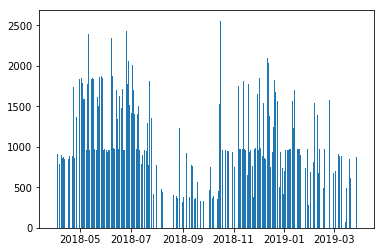

In [29]:
plt.bar(blog_cnt.keys(),blog_cnt.values())

In [32]:
cafe_cnt = {}
cnt=0
for i in set(date):
    cnt = 0
    for j in range(len(cafe_data)):
        if i==date[j]:
            cnt+=1
    cafe_cnt[i] = cnt
    print(i) 

2018-11-24 00:00:00
2019-02-15 00:00:00
2018-09-26 00:00:00
2018-05-06 00:00:00
2018-11-29 00:00:00
2019-01-12 00:00:00
2018-04-13 00:00:00
2018-04-21 00:00:00
2018-04-06 00:00:00
2018-10-03 00:00:00
2018-06-26 00:00:00
2019-01-04 00:00:00
2018-08-11 00:00:00
2018-12-28 00:00:00
2018-07-22 00:00:00
2018-09-18 00:00:00
2018-12-29 00:00:00
2019-01-27 00:00:00
2018-08-27 00:00:00
2019-03-29 00:00:00
2018-07-08 00:00:00
2018-09-23 00:00:00
2018-04-26 00:00:00
2018-04-12 00:00:00
2019-03-31 00:00:00
2019-02-11 00:00:00
2018-06-23 00:00:00
2018-10-08 00:00:00
2018-06-20 00:00:00
2018-05-17 00:00:00
2018-10-22 00:00:00
2019-03-24 00:00:00
2018-07-18 00:00:00
2018-07-27 00:00:00
2018-06-01 00:00:00
2018-09-09 00:00:00
2019-01-14 00:00:00
2019-01-26 00:00:00
2018-11-18 00:00:00
2018-08-28 00:00:00
2018-12-15 00:00:00
2018-10-25 00:00:00
2019-01-05 00:00:00
2018-10-27 00:00:00
2019-03-11 00:00:00
2018-11-03 00:00:00
2018-11-06 00:00:00
2019-02-22 00:00:00
2018-12-20 00:00:00
2018-12-06 00:00:00


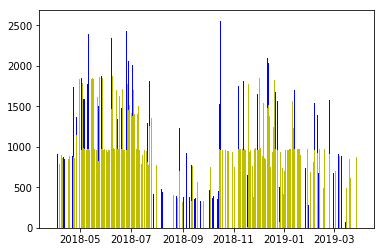

In [39]:
# plt.bar(blog_cnt.keys(),blog_cnt.values(), color = 'b')

plt.bar(news_cnt.keys(),news_cnt.values(), color = 'r')
# plt.bar(cafe_cnt.keys(),cafe_cnt.values(), color = 'y')
plt.show()

In [7]:
okt = Okt()

In [6]:
# title stemmer
news['TITLE'] = [okt.morphs(re.sub("[^가-힣]", " ", news['TITLE'][i]), stem = True) for i in range(len(news))]

# content stemmer
news['CONTENT'] = [okt.morphs(re.sub("[^가-힣]", " ", news['CONTENT'][i])) for i in range(len(news))]

In [18]:
len(date_cnt)

83

<BarContainer object of 83 artists>

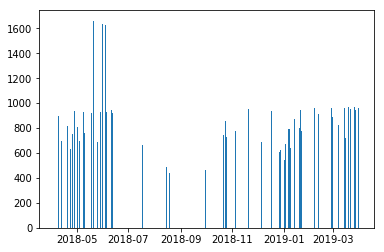

In [22]:
plt.bar(date_cnt.keys(),date_cnt.values())

######################################################################################

In [6]:
f = open('C:/Users/SunA/Desktop/SNS데이터/Kstopwords.txt', 'r', encoding = 'utf-8')
stopword = f.readlines()
f.close()

In [7]:
stopword = [re.sub("[^가-힣]", " ", i).strip() for i in stopword]

In [9]:
newst = []
for i in news['TITLE']:
    temp = [j for j in i if j not in stopword]
    newst.append(temp)

In [10]:
newstemp = []
for i in news['TITLE']:
    temp = [j for j in i if j not in stopword]
    newstemp.extend(temp)

In [11]:
newstemp = list(set(newstemp))
pos = []
for i in newstemp:
    
    pos.extend(okt.pos(i))

In [12]:
pos_sj = []
for i in range(len(pos)):
    if pos[i][1] == 'Josa':
        print(pos[i])
    else:
        pos_sj.append(pos[i])

('다', 'Josa')
('께선', 'Josa')
('이에요', 'Josa')
('으로도', 'Josa')
('니', 'Josa')
('한', 'Josa')
('네', 'Josa')
('이실', 'Josa')
('만으로도', 'Josa')
('다', 'Josa')
('네', 'Josa')
('이네', 'Josa')
('에서', 'Josa')
('아', 'Josa')
('까진', 'Josa')
('에서라도', 'Josa')
('다', 'Josa')
('라는', 'Josa')
('다', 'Josa')
('라니', 'Josa')
('다', 'Josa')
('다', 'Josa')
('네', 'Josa')
('니', 'Josa')
('니', 'Josa')
('니', 'Josa')
('니', 'Josa')
('다', 'Josa')
('라기', 'Josa')
('라곤', 'Josa')
('나', 'Josa')
('이라서', 'Josa')
('나', 'Josa')
('이던', 'Josa')
('죠', 'Josa')
('까지만', 'Josa')
('이다', 'Josa')
('다', 'Josa')
('으론', 'Josa')
('다', 'Josa')
('로군요', 'Josa')
('다', 'Josa')
('니', 'Josa')
('니', 'Josa')
('니', 'Josa')
('이다', 'Josa')
('만치', 'Josa')
('다', 'Josa')
('와의', 'Josa')
('이다', 'Josa')
('다', 'Josa')
('니', 'Josa')
('이다', 'Josa')
('보다는', 'Josa')
('니', 'Josa')
('다', 'Josa')
('에게는', 'Josa')
('이랑', 'Josa')
('만에', 'Josa')
('다', 'Josa')
('이래도', 'Josa')
('다', 'Josa')
('다', 'Josa')
('에서는', 'Josa')
('니', 'Josa')
('다', 'Josa')
('까지는', 'Josa')
('으로만', 'Josa')
(

In [13]:
pos_sj

[('밀리터리', 'Noun'),
 ('농산물', 'Noun'),
 ('똥손', 'Noun'),
 ('웹사이트', 'Noun'),
 ('기선', 'Noun'),
 ('진폐증', 'Noun'),
 ('작전역', 'Noun'),
 ('대아', 'Noun'),
 ('인드라망', 'Noun'),
 ('미라지', 'Noun'),
 ('기와', 'Noun'),
 ('볼륨', 'Noun'),
 ('세탁기', 'Noun'),
 ('효모', 'Noun'),
 ('마카롱', 'Noun'),
 ('오가다', 'Verb'),
 ('드림웍스', 'Noun'),
 ('유산', 'Noun'),
 ('시로', 'Noun'),
 ('느릅나무', 'Noun'),
 ('협오샷', 'Noun'),
 ('월리', 'Noun'),
 ('화산', 'Noun'),
 ('근방', 'Noun'),
 ('축적', 'Noun'),
 ('청원', 'Noun'),
 ('실패', 'Noun'),
 ('해피엔딩', 'Noun'),
 ('끼들', 'Adverb'),
 ('대흥역', 'Noun'),
 ('체질', 'Noun'),
 ('일산서구', 'Noun'),
 ('먹자욤', 'Noun'),
 ('여드레', 'Noun'),
 ('심온', 'Noun'),
 ('파두', 'Noun'),
 ('노동조합', 'Noun'),
 ('붙이', 'Noun'),
 ('뭡', 'Noun'),
 ('사정', 'Noun'),
 ('잠그다', 'Verb'),
 ('환경미화원', 'Noun'),
 ('나무숲', 'Noun'),
 ('독서', 'Noun'),
 ('맛없다', 'Adjective'),
 ('데꼬', 'Noun'),
 ('좌', 'Noun'),
 ('싯업', 'Noun'),
 ('며칠', 'Noun'),
 ('투썸', 'Noun'),
 ('지속가능성', 'Noun'),
 ('삿어', 'Noun'),
 ('신라', 'Noun'),
 ('집착', 'Noun'),
 ('킬롱', 'Noun'),
 ('팔지', 'Noun'),
 ('워터마크